# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results,how="left",on=["Mouse ID","Mouse ID"])

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
length = len(df["Mouse ID"].unique())

length

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate = df[df.duplicated(keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.set_index("Mouse ID")
clean_df = clean_df.drop(labels="g989")
clean_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
length_clean = len(clean_df.index.unique())

length_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_avg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
reg_med = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
reg_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
reg_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
reg_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
reg_summary = pd.DataFrame({"Mean":reg_avg,
                            "Median":reg_med,
                            "Variance":reg_var,
                            "Standard Deviation":reg_std,
                            "SEM":reg_sem})
reg_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

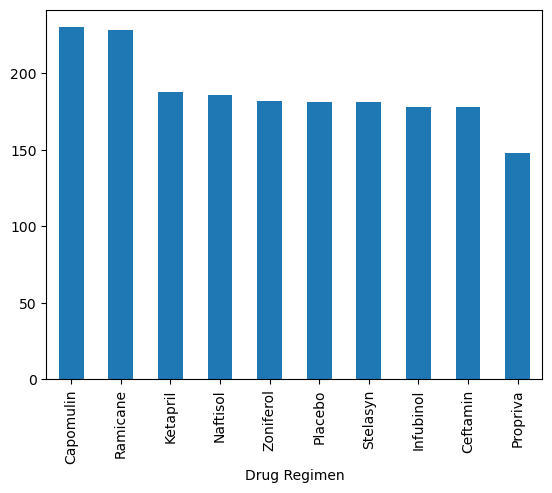

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

reg_count = clean_df["Drug Regimen"].value_counts()
reg_count

reg_count.plot.bar()

<BarContainer object of 10 artists>

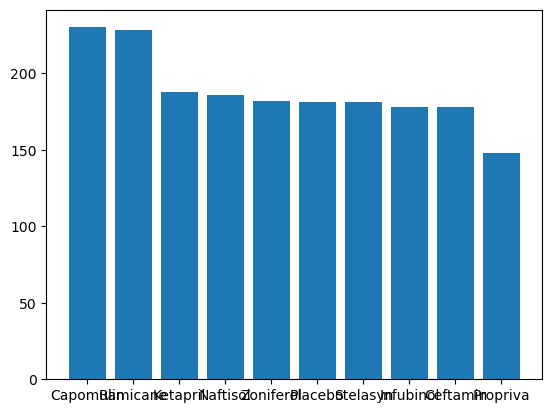

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x=reg_count.index
y=reg_count

plt.bar(x,y)


<Axes: ylabel='count'>

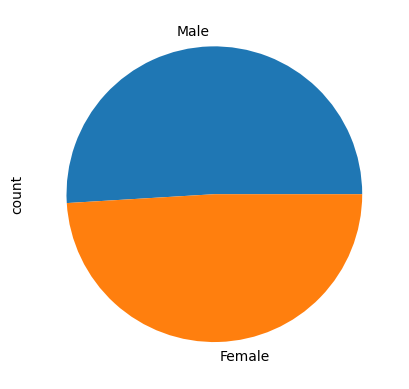

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df["Sex"].value_counts()
sex_count.plot.pie()

([<matplotlib.patches.Wedge at 0x29724474eb0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

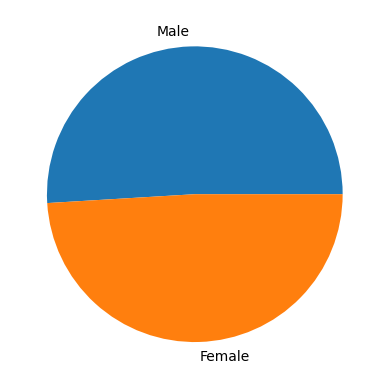

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x=sex_count.index
y=sex_count
plt.pie(y,labels=x)

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reg_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
new_df = pd.DataFrame(clean_df.loc[clean_df["Timepoint"]==45])
new_df = new_df.set_index("Drug Regimen")
#new_df.set_index("Drug Regimen")
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df.head()

,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,
Ramicane,Male,21,16,45,22.050126,1
Capomulin,Female,3,17,45,23.343598,1
Capomulin,Female,16,15,45,28.484033,0
Capomulin,Male,22,17,45,28.430964,1
Ramicane,Male,11,16,45,29.128472,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
volume_final = new_df["Tumor Volume (mm3)"]
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
volume_final

Drug Regimen
Ramicane     22.050126
Capomulin    23.343598
Capomulin    28.484033
Capomulin    28.430964
Ramicane     29.128472
               ...    
Ceftamin     68.594745
Ceftamin     64.729837
Infubinol    62.754451
Naftisol     65.741070
Naftisol     73.867845
Name: Tumor Volume (mm3), Length: 130, dtype: float64

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
